# Marketing Campaign for Banking Products

## Data Description:
The file contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

## Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success.We will build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

## Attribute Information:
● ID: Customer ID
● Age: Customer's age in completed years
● Experience: #years of professional experience
● Income: Annual income of the customer
● ZIP Code: Home Address ZIP code.
● Family: Family size of the customer
● CCAvg: Avg. spending on credit cards per month
● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
● Mortgage: Value of house mortgage if any.
● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
● Securities Account: Does the customer have a securities account with the bank?
● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
● Online: Does the customer use internet banking facilities?
● Credit card: Does the customer use a credit card issued by the bank?


# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.


#### Here we will cover our model in 5 steps i.e Importing Libraries and datasets, Analysing Data, Data Wrangling, train and test data and finding accuracy, last one is business understanding

# Step 1
Importing libraries and dataset

In [1]:
#uploading the main libraries
import numpy as np  #It is used to do array operations, working with array
import pandas as pd  #It is used for data manipulation and analysis or to access and use the dataset
import matplotlib.pyplot as plt #It is used to plot graph ad view them
import seaborn as sns #It is also used for visualization and to draw heatmap and other

In [2]:
#accessing the dataset
loan_data = pd.read_excel(r"H:\Datasets\datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx")
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Step 2
Analyzing Data

In [3]:
#it will tell no. of rows and columns in the dataset
loan_data.shape

(5000, 14)

In [4]:
#data types of each column
loan_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
#info of dataset like no. of non null data in each column
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#gives a full description of a dataset like mean, max, count etc of each column
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Here we  see -3 as experience, which is needed to be inspected.

Income values are skewed

In [7]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
#no. of people with 0 mortgage
(loan_data.Mortgage==0).sum()

3462

In [9]:
#no. of people with 0 credit card spending per month
(loan_data.CCAvg==0).sum()

106

Value Counnt for all categorical values and representing that with the help of pie chart

In [10]:
#value count for family column
loan_data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

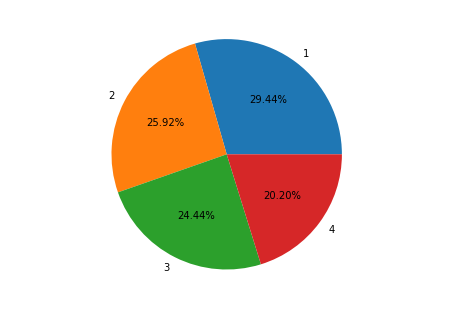

In [11]:
#Pie chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(loan_data['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [12]:
#Education column
loan_data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

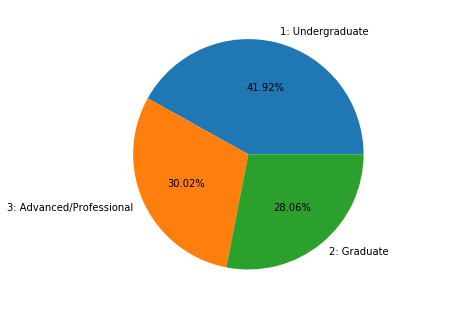

In [13]:
#Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(loan_data['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [14]:
#value count for Security Account column
loan_data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

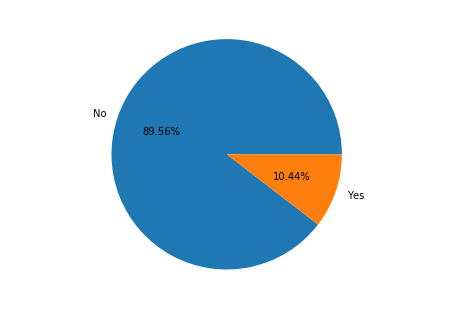

In [15]:
#pie chart representation
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['No', 'Yes']
ax.pie(loan_data['Securities Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [16]:
#value count for CD Account data
loan_data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

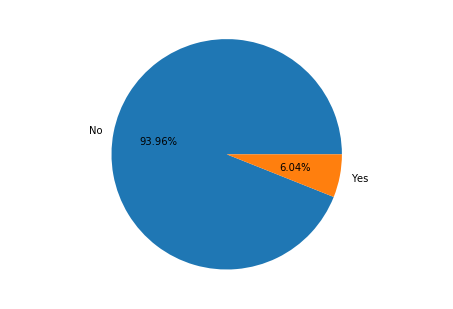

In [17]:
#pie chart representation
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['No','Yes']
ax.pie(loan_data['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [18]:
#value count for Credit Card
loan_data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

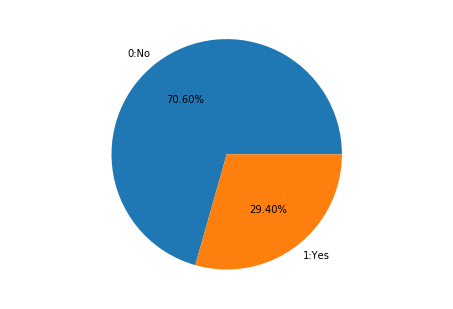

In [19]:
#Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(loan_data['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [20]:
#value count for Online column
loan_data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

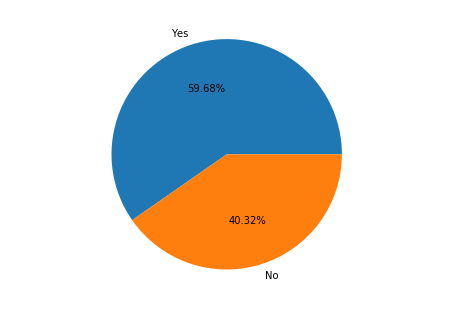

In [21]:
#Pie Chart Representation
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['Yes','No']
ax.pie(loan_data['Online'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [22]:
#value count for personal loan
loan_data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

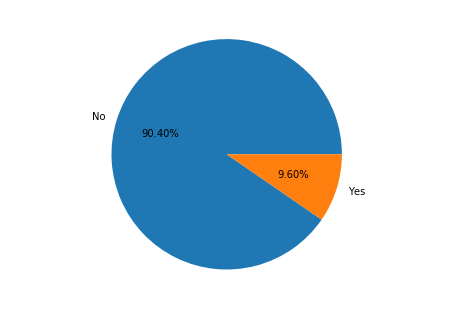

In [23]:
#Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['No','Yes']
ax.pie(loan_data['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Univariate and Bivariate Analysis

In [24]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


lets have a better insight through countplot

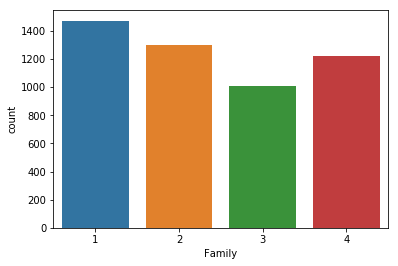

In [25]:
sns.countplot(x="Family",data=loan_data)

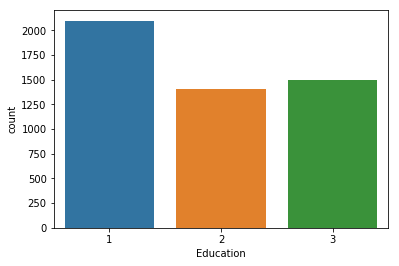

In [26]:
sns.countplot(x="Education",data=loan_data)

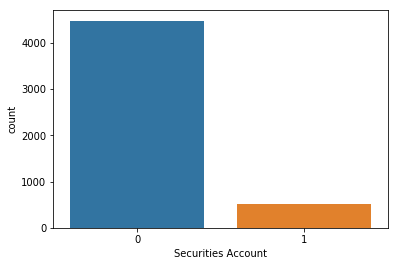

In [27]:
sns.countplot(x="Securities Account",data=loan_data)

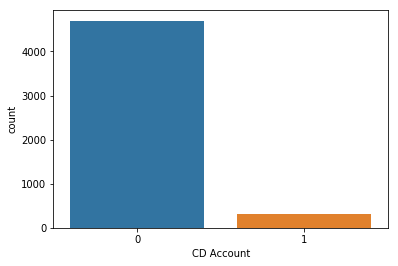

In [28]:
sns.countplot(x="CD Account",data=loan_data)

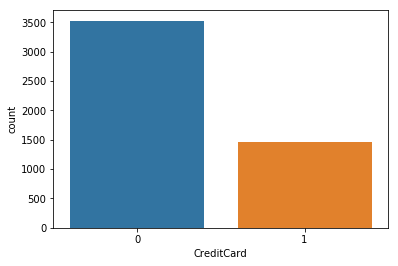

In [29]:
sns.countplot(x="CreditCard",data=loan_data)

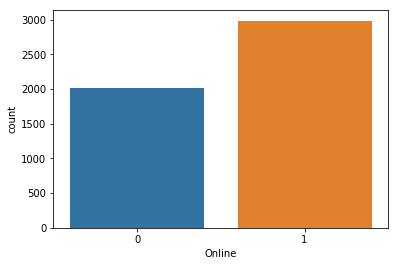

In [30]:
sns.countplot(x="Online",data=loan_data)

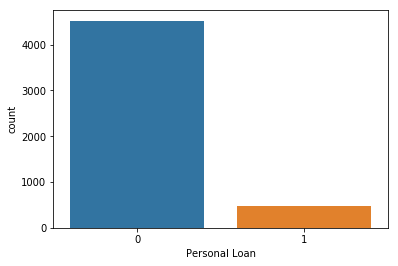

In [31]:
sns.countplot(x="Personal Loan",data=loan_data)

Now, we will see remaining columns with distplot because countplot are not able to give good insights about that column

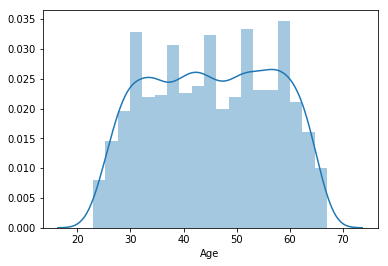

In [33]:
sns.distplot(loan_data.Age)

Age columm data is symmetricaly distributed

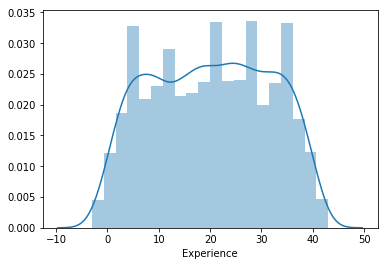

In [34]:
sns.distplot(loan_data.Experience)

Similarly,Experience column as well

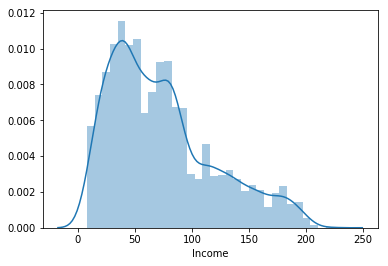

In [35]:
sns.distplot(loan_data.Income)

Income column is skewed one

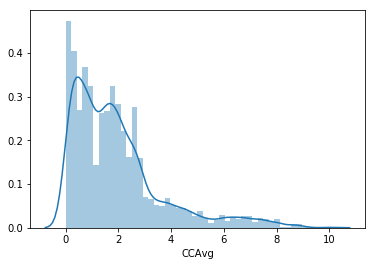

In [36]:
sns.distplot(loan_data["CCAvg"])

Similarly CCAvg as well

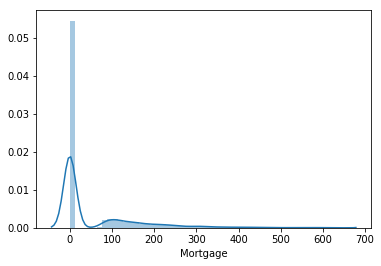

In [37]:
sns.distplot(loan_data.Mortgage)

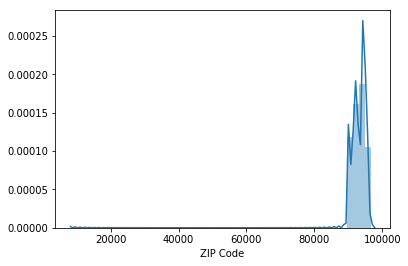

In [38]:
sns.distplot(loan_data["ZIP Code"])

Similarly ZIP code and Mortgage column as well

In [39]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


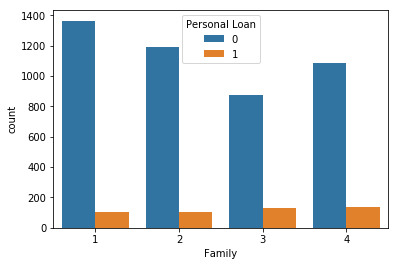

In [40]:
#now we will saw data w.r.t Personal loan. i.e how it is related to our target variable
sns.countplot(x="Family",hue="Personal Loan",data=loan_data)

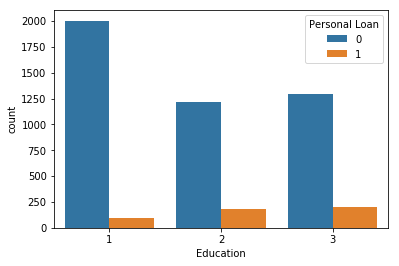

In [41]:
sns.countplot(x="Education",hue="Personal Loan",data=loan_data)

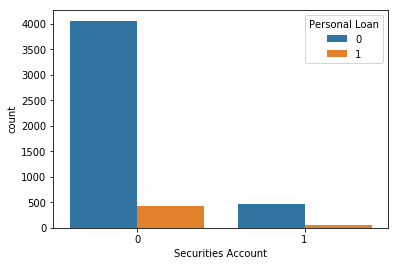

In [42]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=loan_data)

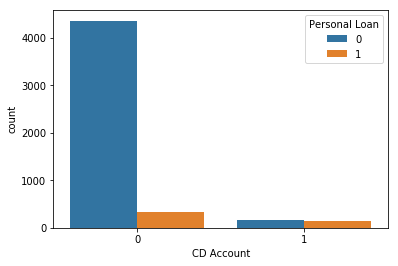

In [43]:
sns.countplot(x="CD Account",hue="Personal Loan",data=loan_data)

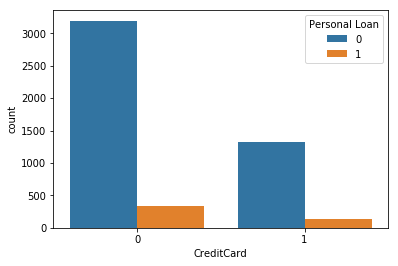

In [44]:
sns.countplot(x="CreditCard",hue="Personal Loan",data=loan_data)

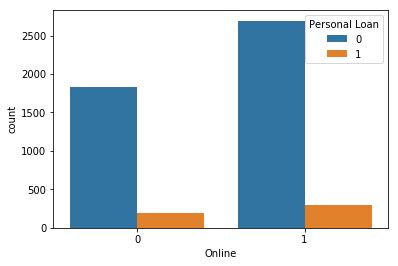

In [45]:
sns.countplot(x="Online",hue="Personal Loan",data=loan_data)

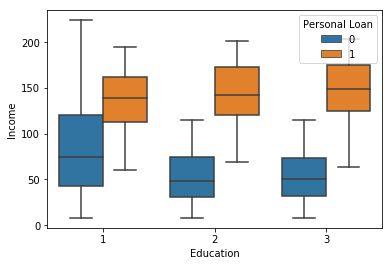

In [46]:
sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=loan_data)

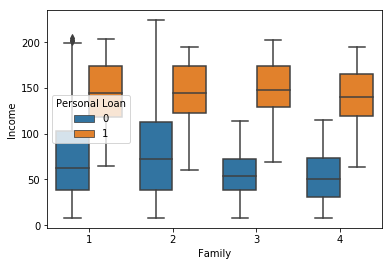

In [47]:
sns.boxplot(x="Family",y="Income",hue="Personal Loan",data=loan_data)

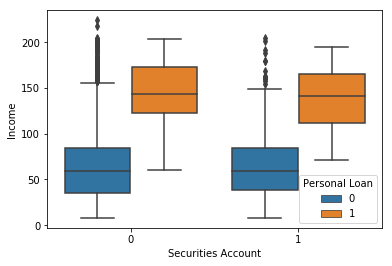

In [48]:
sns.boxplot(x="Securities Account",y="Income",hue="Personal Loan",data=loan_data)

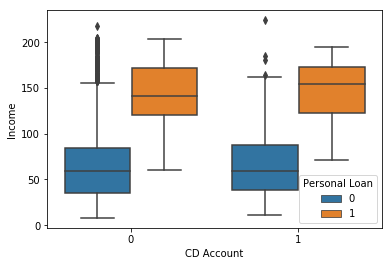

In [49]:
sns.boxplot(x="CD Account",y="Income",hue="Personal Loan",data=loan_data)

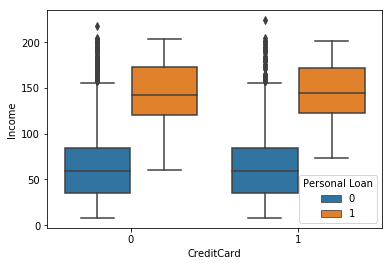

In [50]:
sns.boxplot(x="CreditCard",y="Income",hue="Personal Loan",data=loan_data)

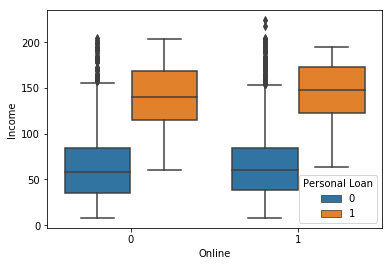

In [51]:
sns.boxplot(x="Online",y="Income",hue="Personal Loan",data=loan_data)

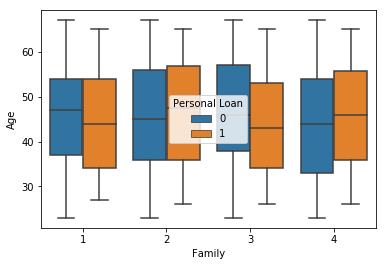

In [52]:
sns.boxplot(x="Family",y="Age",hue="Personal Loan",data=loan_data)

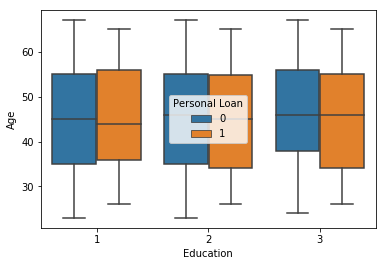

In [53]:
sns.boxplot(x="Education",y="Age",hue="Personal Loan",data=loan_data)

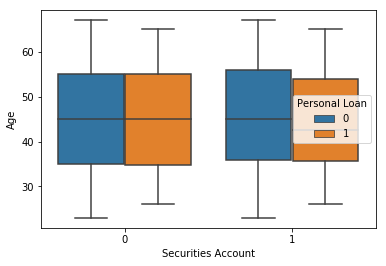

In [54]:
sns.boxplot(x="Securities Account",y="Age",hue="Personal Loan",data=loan_data)

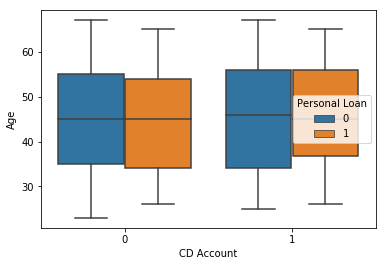

In [55]:
sns.boxplot(x="CD Account",y="Age",hue="Personal Loan",data=loan_data)

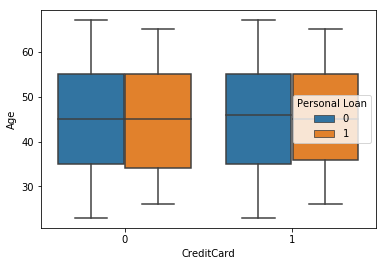

In [56]:
sns.boxplot(x="CreditCard",y="Age",hue="Personal Loan",data=loan_data)

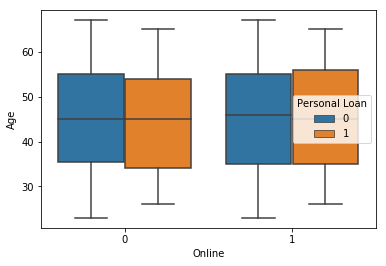

In [57]:
sns.boxplot(x="Online",y="Age",hue="Personal Loan",data=loan_data)

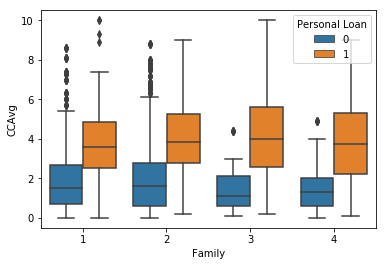

In [58]:
sns.boxplot(x="Family",y="CCAvg",hue="Personal Loan",data=loan_data)

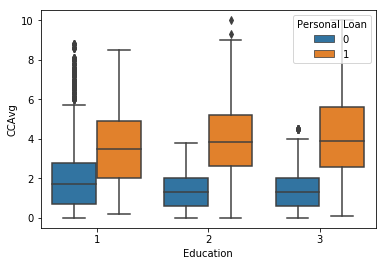

In [59]:
sns.boxplot(x="Education",y="CCAvg",hue="Personal Loan",data=loan_data)

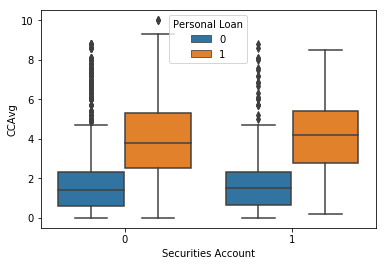

In [60]:
sns.boxplot(x="Securities Account",y="CCAvg",hue="Personal Loan",data=loan_data)

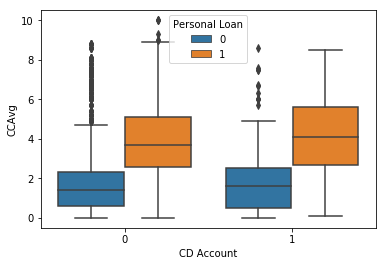

In [61]:
sns.boxplot(x="CD Account",y="CCAvg",hue="Personal Loan",data=loan_data)

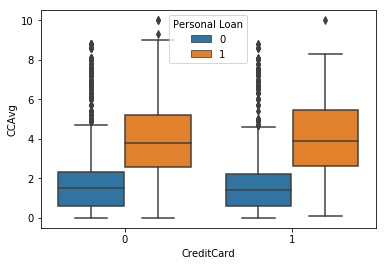

In [62]:
sns.boxplot(x="CreditCard",y="CCAvg",hue="Personal Loan",data=loan_data)

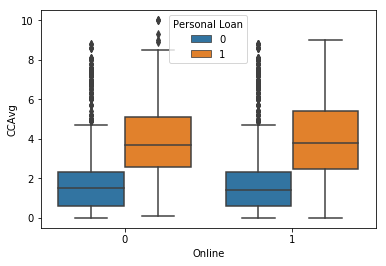

In [63]:
sns.boxplot(x="Online",y="CCAvg",hue="Personal Loan",data=loan_data)

lets see a brief look using pairplot

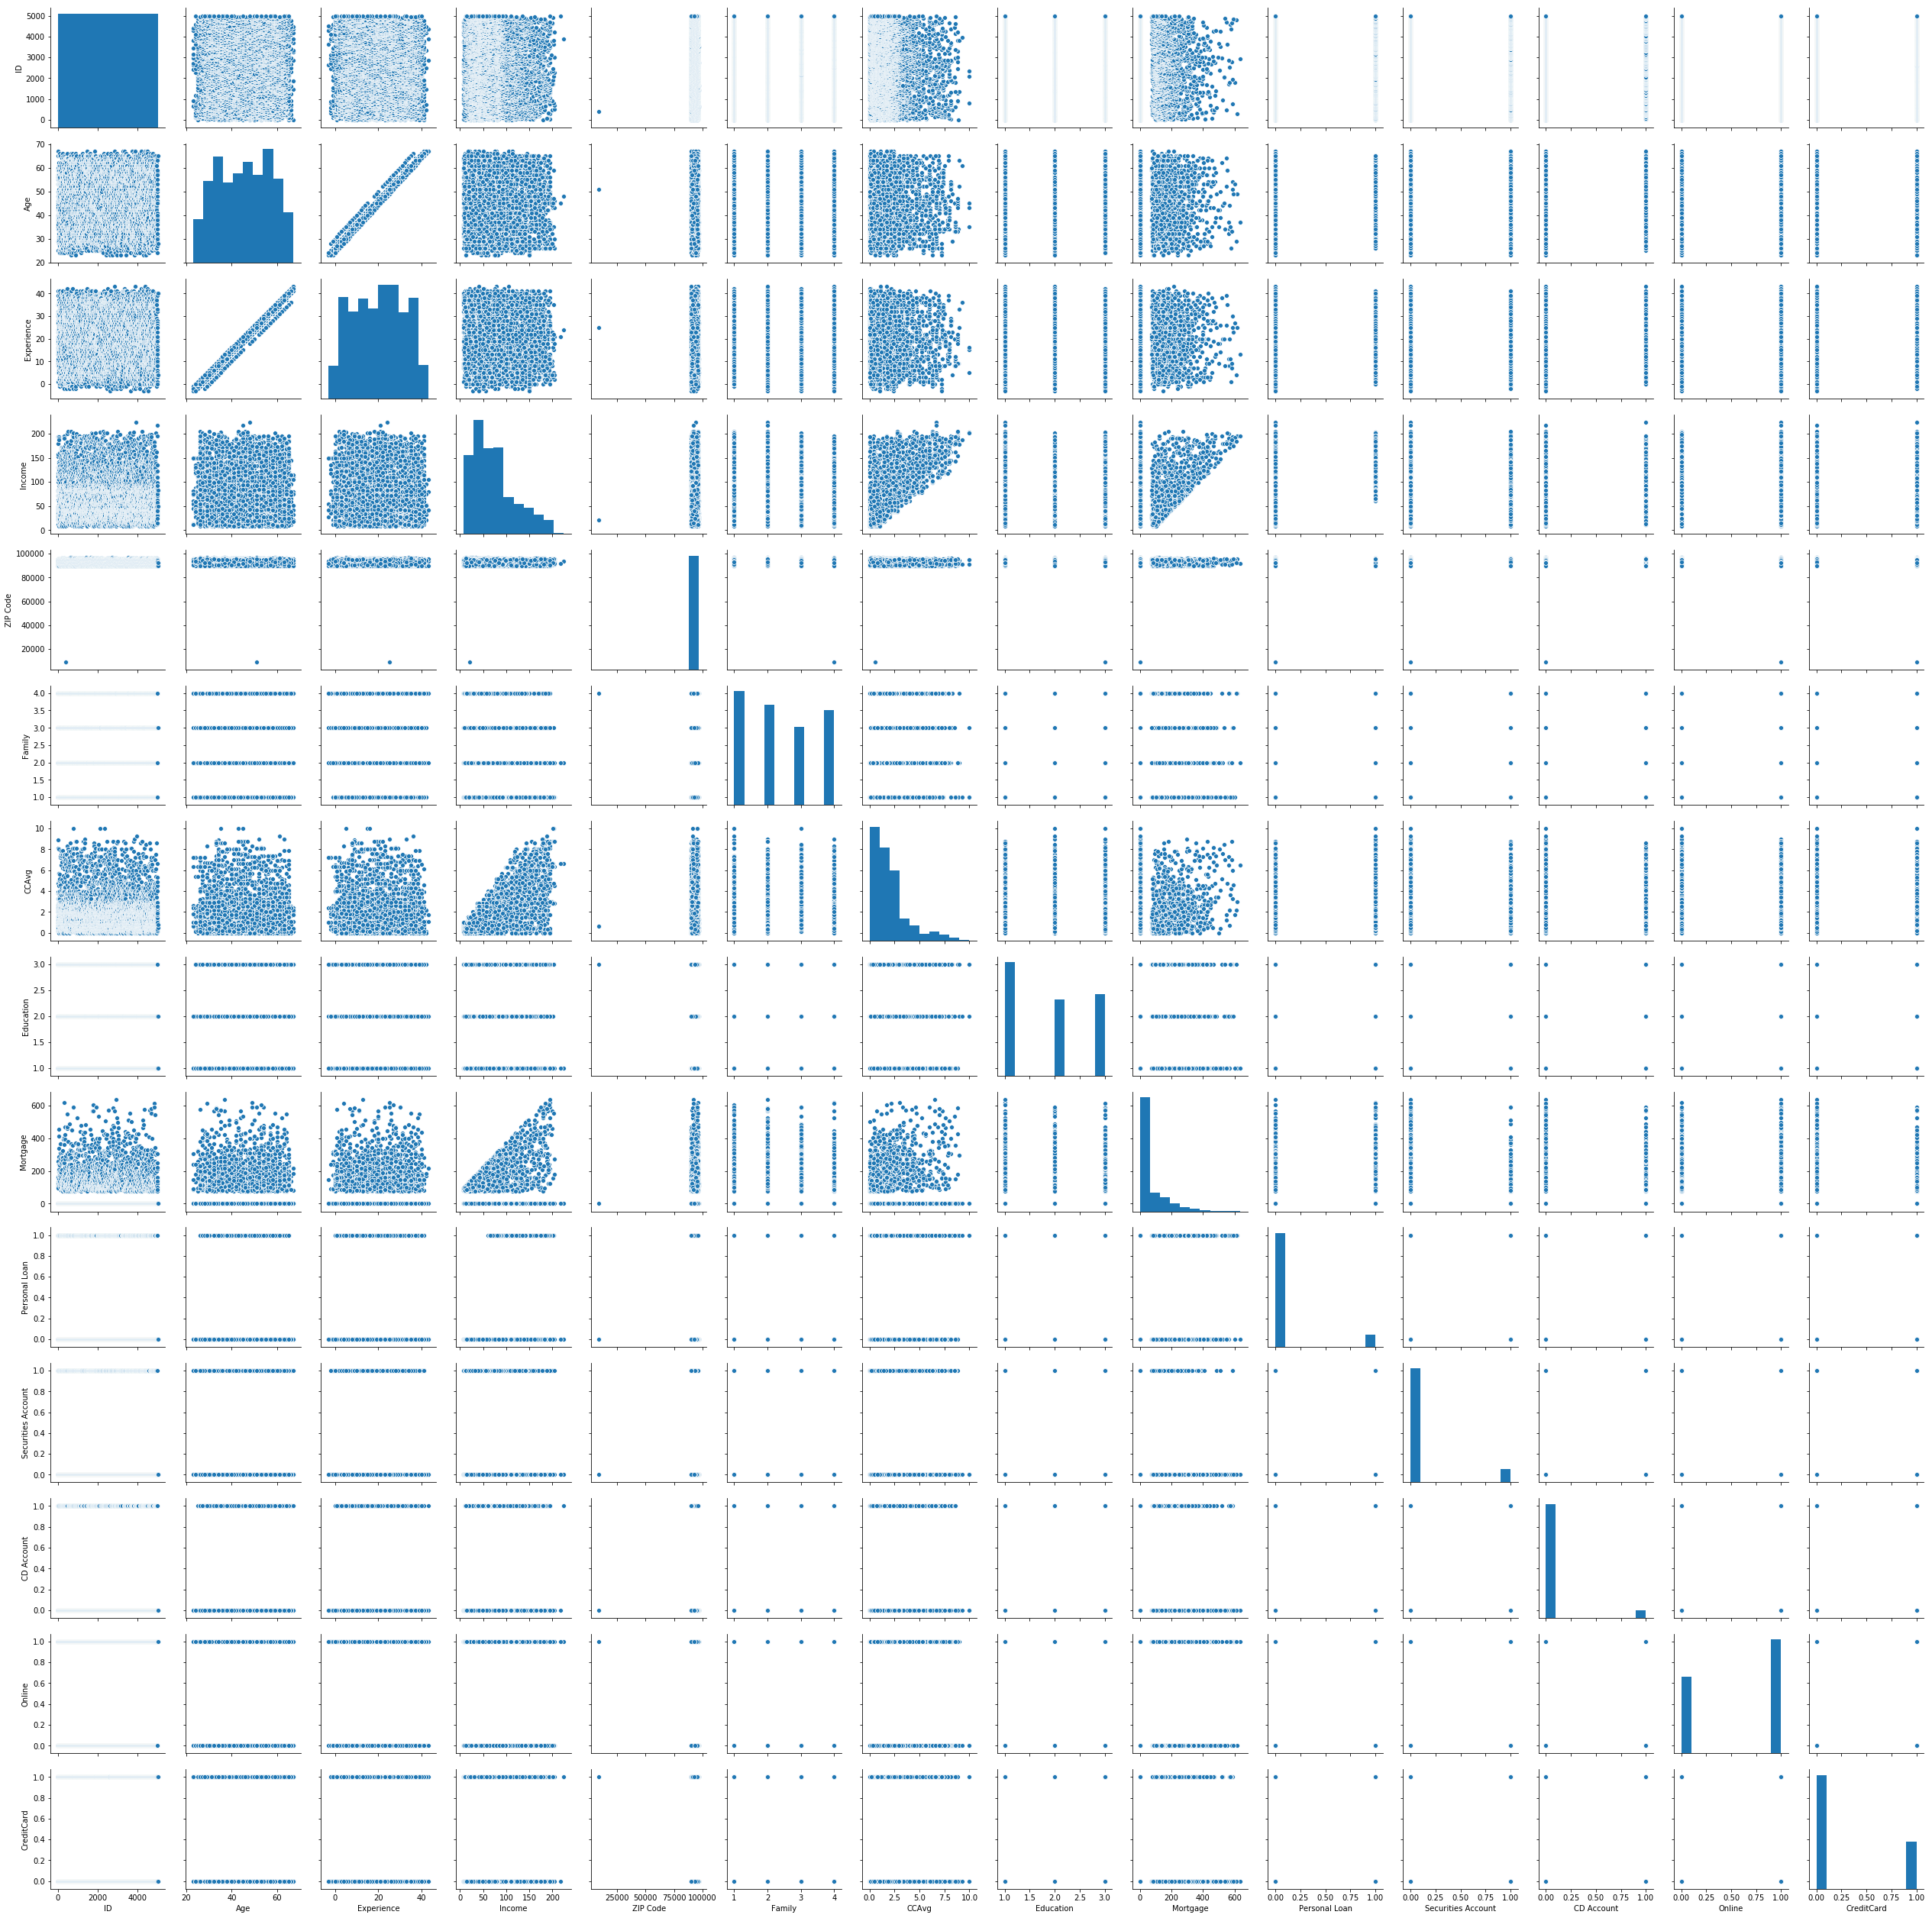

In [64]:
sns.pairplot(loan_data)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


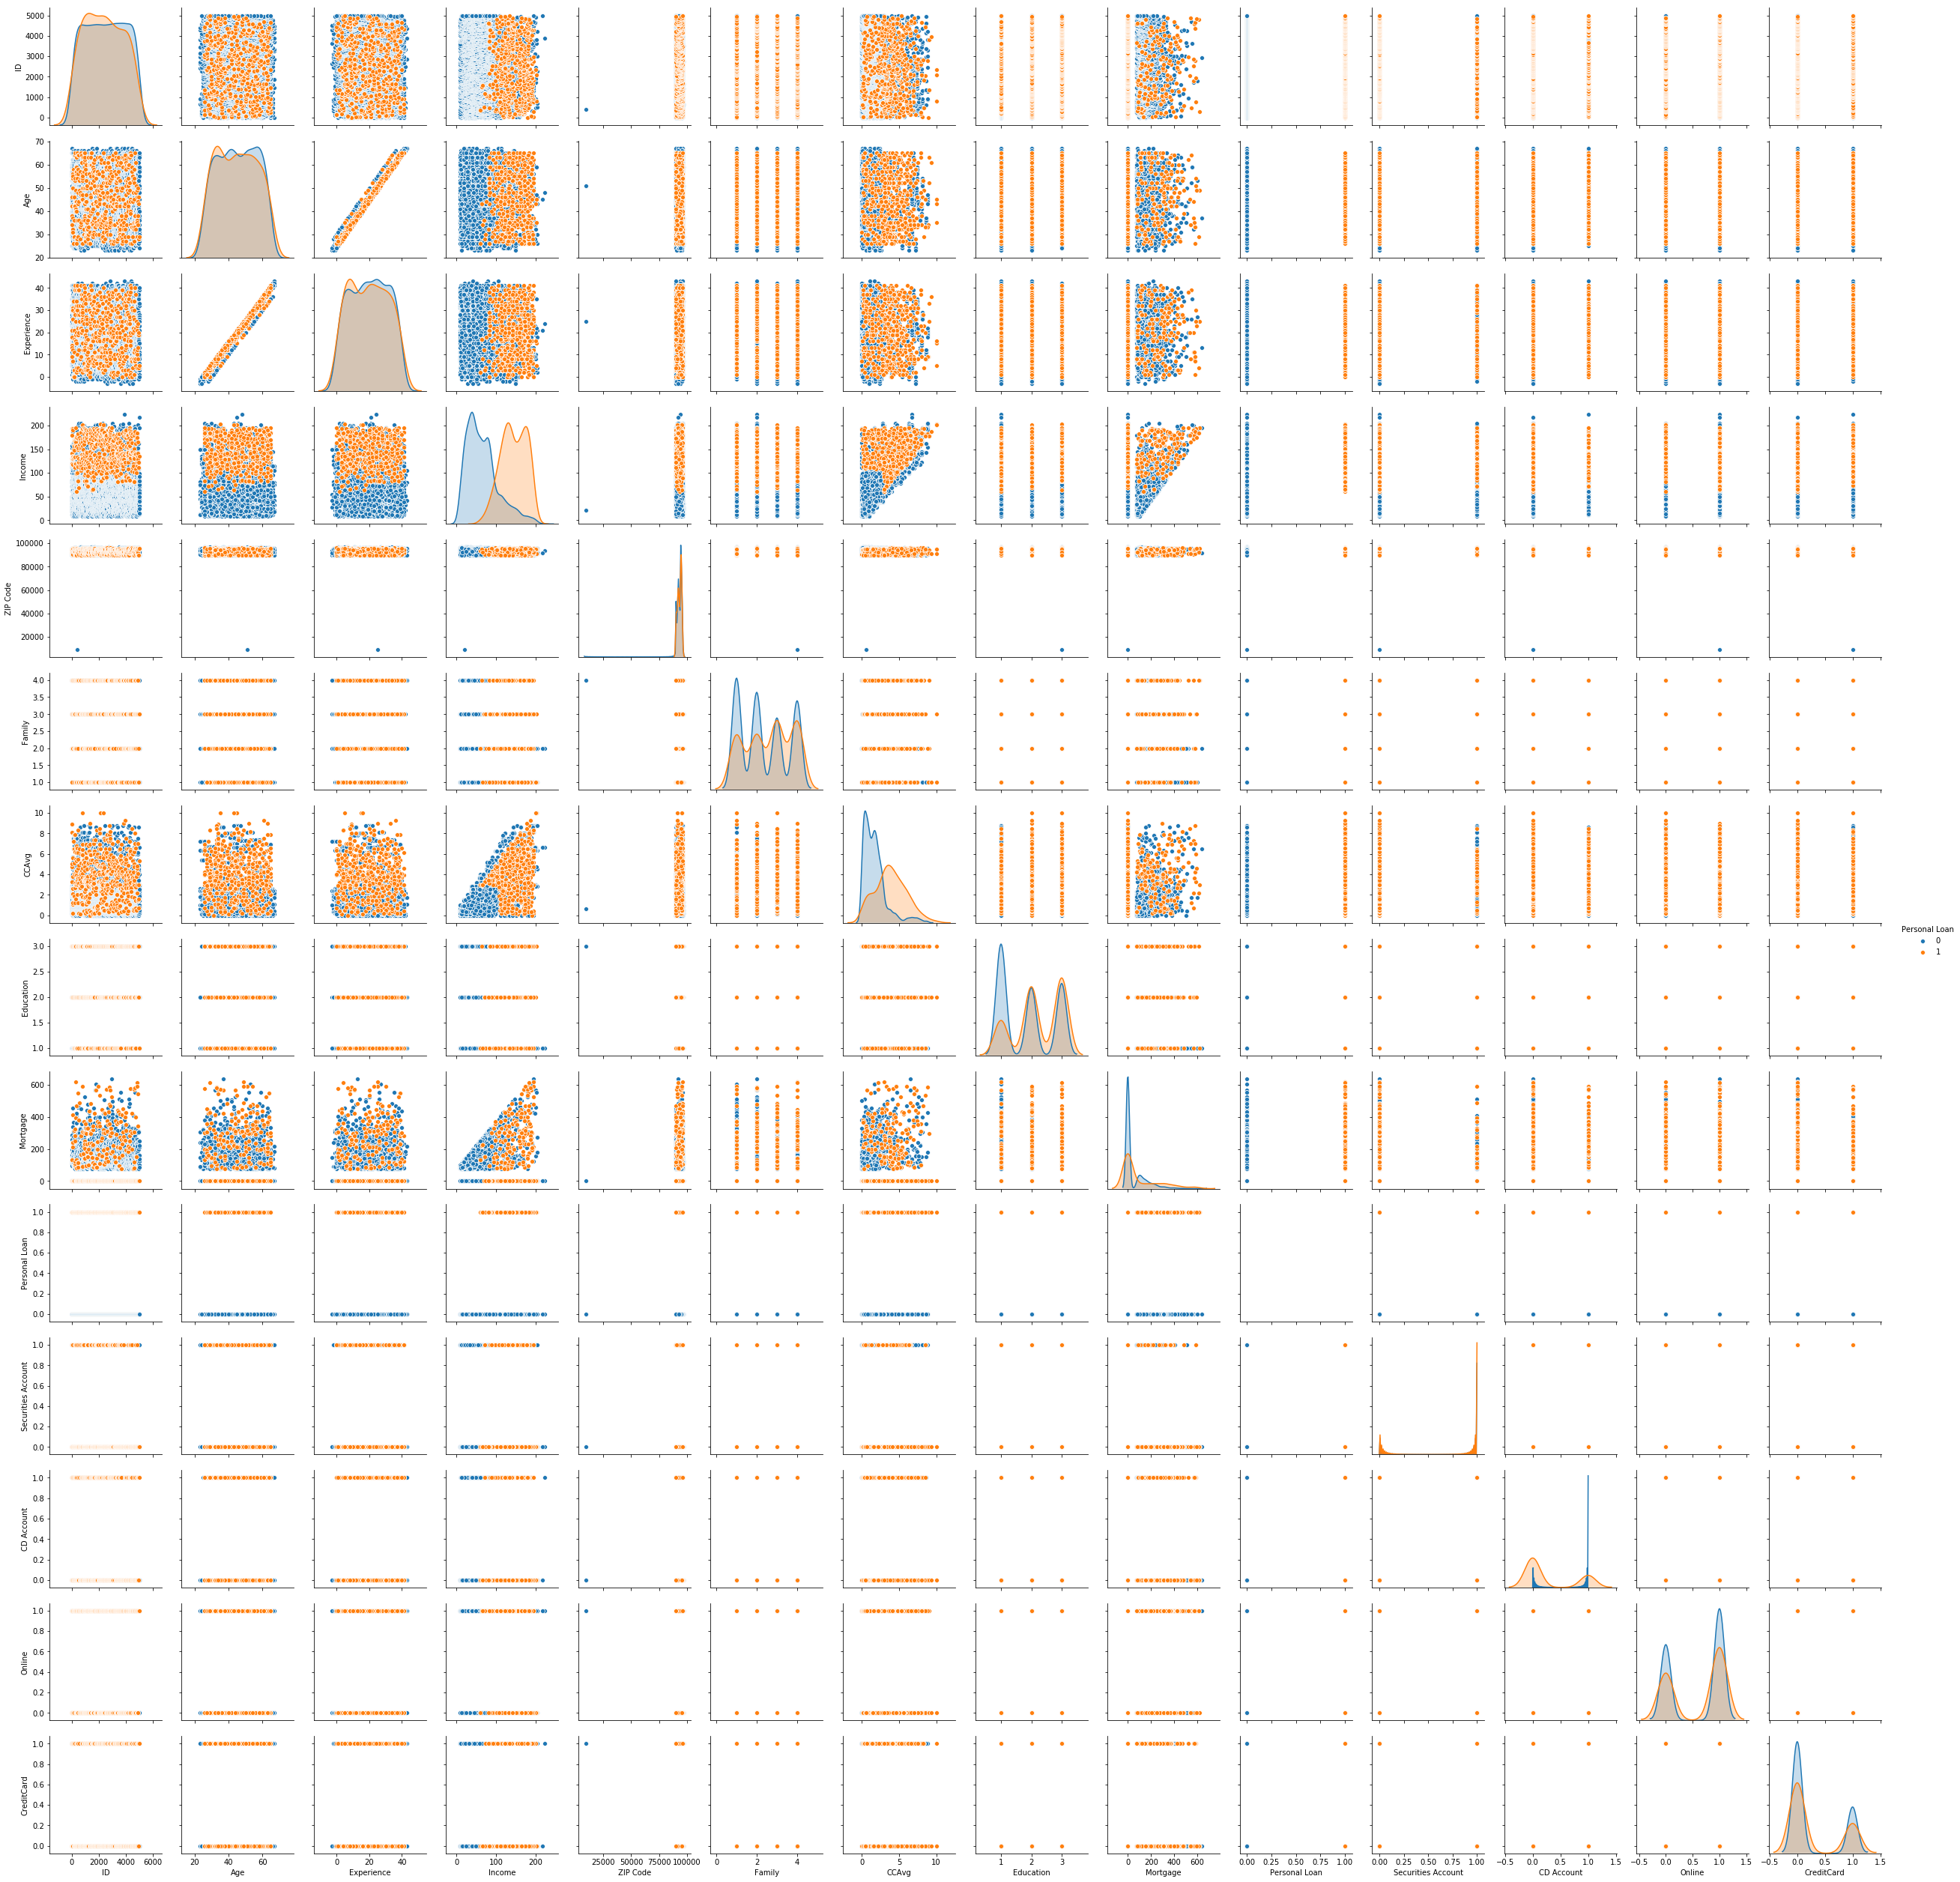

In [65]:
sns.pairplot(loan_data,hue="Personal Loan")

# Step 3
Data Wrangling

Here we will look each column and delete the column which is not required

In [66]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [67]:
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From here we can analyse that experience column has negative value so, we have to take a look at that

In [68]:
loan_data.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

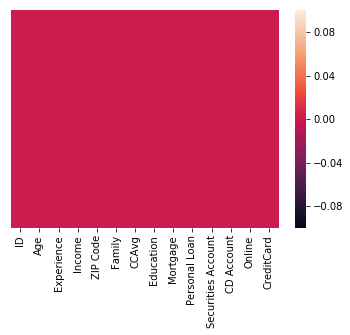

In [70]:
sns.heatmap(loan_data.isnull(),yticklabels=False)

There is no null value in the dataset so we cant remove data on that basis

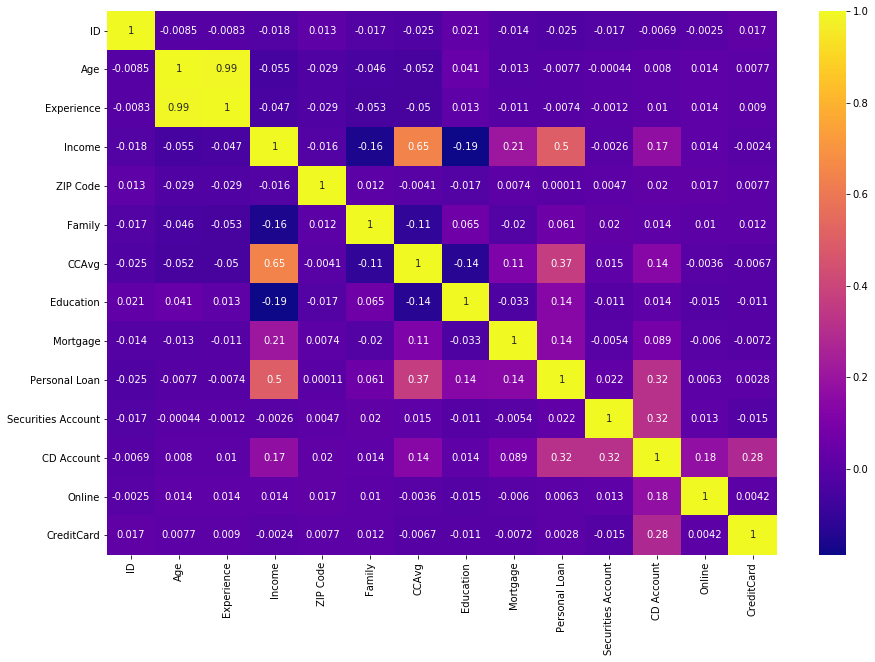

In [71]:
#lets look for correlation btw columns with the help of heatmap
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(loan_data.corr(),cmap="plasma",annot=True)

As we can see from above age and experience column have very high correlation and this may affect our program as well so we need to take a look at that

In [72]:
loan_data=loan_data.drop("Experience",axis=1)
loan_data.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


We had deleted Experience column bcz it is highly correlated to age column as well as it has negative value as well

In [73]:
#lets delete ID column as well, as there is no as suvh significance in the dataset and is not affecting our result
loan_data=loan_data.drop("ID",axis=1)

In [74]:
loan_data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


No. of unique data in each column

In [75]:
loan_data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

From above we can see ZIP code has highest no. of unique values ,and if we apply transformation like one hot encoding than there will be a problem of multicolinearality, so we would drop this column as well

In [76]:
loan_data=loan_data.drop("ZIP Code",axis=1)
loan_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


Transformation of Feature Variables

In [77]:
X = loan_data.drop("Personal Loan",axis=1)
y = loan_data.iloc[:,6]

In [78]:
X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [79]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

### Normalization of data

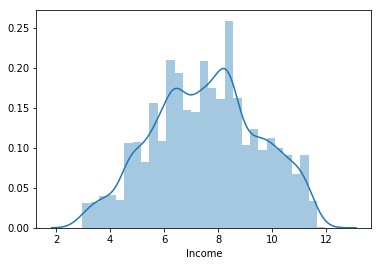

In [80]:
from sklearn.preprocessing import PowerTransformer
x=PowerTransformer(method="yeo-johnson",standardize=False)
x.fit(X["Income"].values.reshape(-1,1))
X["Income"]=x.transform(X["Income"].values.reshape(-1,1))
sns.distplot(X["Income"])

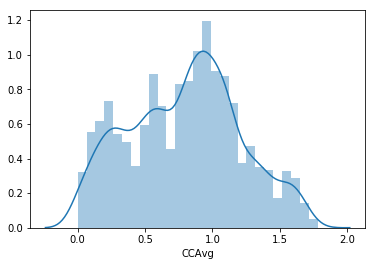

In [81]:
x=PowerTransformer(method="yeo-johnson",standardize=False)
x.fit(X["CCAvg"].values.reshape(-1,1))
X["CCAvg"]=x.transform(X["CCAvg"].values.reshape(-1,1))
sns.distplot(X.CCAvg)

In [82]:
#Transforming Mortgage through Label Encoding
X['mortgage']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'], axis=1, inplace=True)

In [83]:
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,mortgage
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


# Step 4
Train and Test data and finding accuracy

### Splitting the data into training and testing data set

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, stratify=y, random_state=0)

In [85]:
X_train

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,mortgage
3789,51,5.058173,3,0.322048,1,0,0,1,1,0
758,64,5.948841,1,0.814468,2,1,0,0,0,0
2868,52,5.651776,4,0.902268,1,0,0,1,1,0
2550,32,4.661500,1,0.384643,3,0,0,1,0,1
2150,62,7.097040,1,0.544705,1,1,0,0,1,0
1248,44,5.948841,4,-0.000000,2,0,0,1,0,0
4440,43,8.063255,3,0.253538,3,0,0,0,0,0
2318,60,4.963664,1,0.544705,2,0,0,1,0,1
43,39,6.597314,1,0.495347,1,0,0,1,0,0
3747,26,8.379274,3,1.299527,2,0,0,1,0,0


In [86]:
X_test

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,mortgage
9,34,11.100150,1,1.722778,3,0,0,0,0,0
461,55,8.302424,2,1.271913,1,1,0,0,0,0
3700,48,9.831967,1,1.497486,1,1,0,0,0,0
1559,59,9.049404,4,1.162156,2,0,0,1,0,1
4558,44,8.341020,2,0.322048,1,0,0,1,1,0
4504,27,6.351766,4,0.902268,3,0,0,0,0,1
3053,28,9.426780,2,0.178029,1,0,0,1,0,0
1358,50,8.379274,1,1.126262,2,0,0,1,1,0
2402,48,4.963664,3,0.478073,2,0,0,0,0,0
105,24,5.948841,3,0.094128,2,1,0,1,0,0


In [88]:
y_train

3789    0
758     0
2868    0
2550    0
2150    0
1248    0
4440    0
2318    0
43      0
3747    1
2881    0
4980    1
4681    0
3881    0
703     0
4850    0
4901    0
3270    1
2863    0
356     0
4846    1
1109    0
2516    0
384     0
3357    0
2712    0
2593    1
4140    0
1261    0
1450    0
       ..
1257    0
2998    0
4855    0
1966    0
4592    0
4519    0
4196    0
3738    0
156     0
4302    1
3523    0
4607    0
1521    0
3072    0
804     0
455     0
4049    0
1502    0
853     0
1396    0
1235    0
2307    0
3864    1
423     0
3848    0
3597    0
4670    0
988     0
2037    0
2174    0
Name: Personal Loan, Length: 3500, dtype: int64

In [89]:
y_test

9       1
461     0
3700    0
1559    1
4558    0
4504    0
3053    0
1358    0
2402    0
105     0
4617    0
4590    1
2899    0
1968    0
3206    0
2804    0
2403    1
3947    1
2118    0
1438    0
2272    0
3998    0
561     0
1356    0
3365    0
1065    0
2382    1
3659    0
2438    0
820     0
       ..
1787    0
2450    0
3392    0
299     1
2781    0
783     0
4693    0
2660    0
1445    0
2434    0
2381    0
2942    0
2426    0
3036    0
3565    0
919     0
302     0
2911    0
111     0
1075    0
4685    0
1849    0
3892    0
1612    0
4714    0
2180    0
3484    0
2965    0
2493    0
3224    0
Name: Personal Loan, Length: 1500, dtype: int64

### Building Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lg = LogisticRegression()

In [92]:
res=lg.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
pred_test1 = lg.predict(X_test)

In [94]:
pred_test1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
y_test

9       1
461     0
3700    0
1559    1
4558    0
4504    0
3053    0
1358    0
2402    0
105     0
4617    0
4590    1
2899    0
1968    0
3206    0
2804    0
2403    1
3947    1
2118    0
1438    0
2272    0
3998    0
561     0
1356    0
3365    0
1065    0
2382    1
3659    0
2438    0
820     0
       ..
1787    0
2450    0
3392    0
299     1
2781    0
783     0
4693    0
2660    0
1445    0
2434    0
2381    0
2942    0
2426    0
3036    0
3565    0
919     0
302     0
2911    0
111     0
1075    0
4685    0
1849    0
3892    0
1612    0
4714    0
2180    0
3484    0
2965    0
2493    0
3224    0
Name: Personal Loan, Length: 1500, dtype: int64

In [96]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,recall_score,precision_score,roc_auc_score

In [97]:
classification_report(y_test,pred_test1)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      1356\n           1       0.90      0.53      0.67       144\n\n   micro avg       0.95      0.95      0.95      1500\n   macro avg       0.93      0.76      0.82      1500\nweighted avg       0.95      0.95      0.94      1500\n'

In [98]:
accuracy_score(y_test,pred_test1)

0.9493333333333334

In [99]:
pred_train1 = lg.predict(X_train)

In [100]:
accuracy_score(y_train,pred_train1)

0.9494285714285714

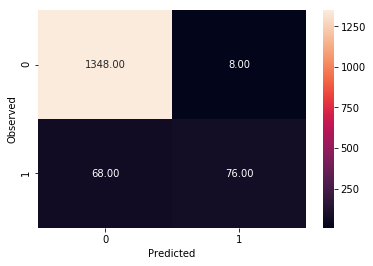

In [101]:
cm=confusion_matrix(y_test,pred_test1)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predicted")
plt.show()

In [102]:
recall_score(y_test,pred_test1)

0.5277777777777778

In [103]:
precision_score(y_test,pred_test1)

0.9047619047619048

In [104]:
f1_score(y_test,pred_test1)

0.6666666666666666

In [105]:
roc_auc_score(y_test,pred_test1)

0.7609390363815143

### Applying KNN Algorithm

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
kn = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [108]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
pred_test2 = kn.predict(X_test)

In [109]:
accuracy_score(y_test,pred_test2)

0.962

In [110]:
pred_train2 = kn.predict(X_train)

In [111]:
accuracy_score(y_train,pred_train2)

0.9651428571428572

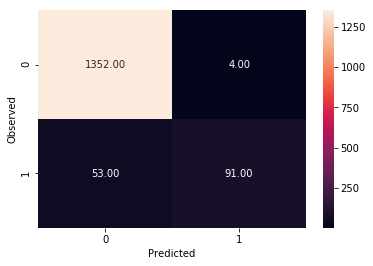

In [112]:
cm=confusion_matrix(y_test,pred_test2)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predicted")
plt.show()

In [113]:
classification_report(y_test,pred_test2)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      1356\n           1       0.96      0.63      0.76       144\n\n   micro avg       0.96      0.96      0.96      1500\n   macro avg       0.96      0.81      0.87      1500\nweighted avg       0.96      0.96      0.96      1500\n'

In [114]:
recall_score(y_test,pred_test2)

0.6319444444444444

In [115]:
precision_score(y_test,pred_test2)

0.9578947368421052

In [116]:
f1_score(y_test,pred_test2)

0.7615062761506275

In [117]:
roc_auc_score(y_test,pred_test2)

0.8144972959685348

### Building Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dt = DecisionTreeClassifier(random_state=0,max_depth=8)

In [120]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [121]:
pred_test3 = dt.predict(X_test)

In [122]:
pred_train3 = dt.predict(X_train)

In [123]:
accuracy_score(y_test,pred_test3)

0.9813333333333333

In [124]:
accuracy_score(y_train,pred_train3)

0.9957142857142857

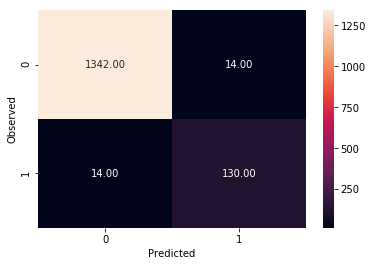

In [125]:
cm=confusion_matrix(y_test,pred_test3)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predicted")
plt.show()

In [126]:
classification_report(y_test,pred_test3)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1356\n           1       0.90      0.90      0.90       144\n\n   micro avg       0.98      0.98      0.98      1500\n   macro avg       0.95      0.95      0.95      1500\nweighted avg       0.98      0.98      0.98      1500\n'

In [128]:
print("f1-score:",f1_score(y_test,pred_test3))
print("Precision score:",precision_score(y_test,pred_test3))
print("Recall score:",recall_score(y_test,pred_test3))
print("ROC score:", roc_auc_score(y_test,pred_test3))

f1-score: 0.9027777777777778
Precision score: 0.9027777777777778
Recall score: 0.9027777777777778
ROC score: 0.9462266470009832


### Implementing Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rc = RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)

In [131]:
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
pred_test4 = rc.predict(X_test)

In [133]:
pred_train4 = rc.predict(X_train)

In [134]:
accuracy_score(y_test,pred_test4)

0.9873333333333333

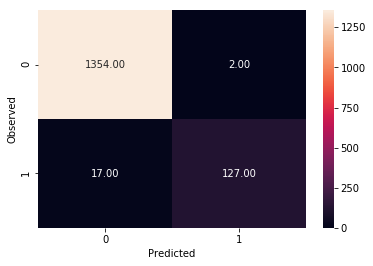

In [135]:
cm=confusion_matrix(y_test,pred_test4)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predicted")
plt.show()

In [136]:
classification_report(y_test,pred_test4)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1356\n           1       0.98      0.88      0.93       144\n\n   micro avg       0.99      0.99      0.99      1500\n   macro avg       0.99      0.94      0.96      1500\nweighted avg       0.99      0.99      0.99      1500\n'

In [137]:
print("f1-score:",f1_score(y_test,pred_test4))
print("Precision score:",precision_score(y_test,pred_test4))
print("Recall score:",recall_score(y_test,pred_test4))
print("ROC score:", roc_auc_score(y_test,pred_test4))

f1-score: 0.9304029304029303
Precision score: 0.9844961240310077
Recall score: 0.8819444444444444
ROC score: 0.9402347590953786


# Step 5
Business Understanding

After completing all the 4 steps successfully, we are here at our fifth and last step, where we will share some insights
1. We saw that our experience column have some negative value i.e. 3 and it is highly correlated to age column as well due to which we drop that column
2. Similarly Id column have no significance so we drop that too
3. We also observe that mortgage column can be ignored as in most of cases house is not morgaged,in that case we apply label encoding to our column and transformed it into new one
4. ZIP code which has large no. of unique values and related to area, hence drop that one too
5. With the help of countplot and boxplot we get to know that Data of Personal Loan is overlapped w.r.t to most of the variables
6. We can also observe that income column has good significance wrt to Personal Loan as above a level of income people have taken a personal loan,lower income group dont take a loan
7. We had 5000 rows and 14 columns where datatype of all are int except one
8. There is no null value in our dataset
9. There are 3462 people with 0 mortgage value
10. There are 106 no. of people with 0 credit card spending per month
11. We also saw value counts for various columns with the help of pie chart as well
12. We also saw Univariate and Bivariate Analysis using countplot, boxplot and distplot
13. With the help of distplot, we saw that age and experience are symmetricaly distributed
14. Whereas Income,CCAvg,mortgage,ZIP code are skewed value
15. We also use pairplot for a brief view 
16. We normalize Income and CCAvg column using PowerTransformer
17. We split our data into 70:30 ratio
18. We apply Four model to our dataset i.e. LogisticRegression, KNN, Decision Tree, Random Forest

#### Logistic Regression
Train data accuracy: 0.9494285714285714 ;
Test data accuracy: 0.9493333333333334
#### KNN
Train data accuracy: 0.9651428571428572 ;
Test data accuracy: 0.962
#### Decision Tree
Train data accuracy: 0.9957142857142857 ;
Test data accuracy: 0.9813333333333333
#### Random Forest
Train data accuracy: 0.97749 ;
Test data accuracy: 0.9873333333333333

After taking in account among 4 algo we can say Decision Tree and Random Forest are better one, but if we talk about best than according to Confusion Matrix, we can say Decision Tree is much better than Random Forest